<a href="https://colab.research.google.com/github/praveenkumarprabakar18/Classnotes/blob/main/CustomerAnalytics_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set()

In [ ]:

segment_data=pd.read_csv("https://raw.githubusercontent.com/praveenkumarprabakar18/firstrepo/main/segmentation%20data.csv")
segment_data.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


segment_data.describe()

In [ ]:
segment_data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
segment_data.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


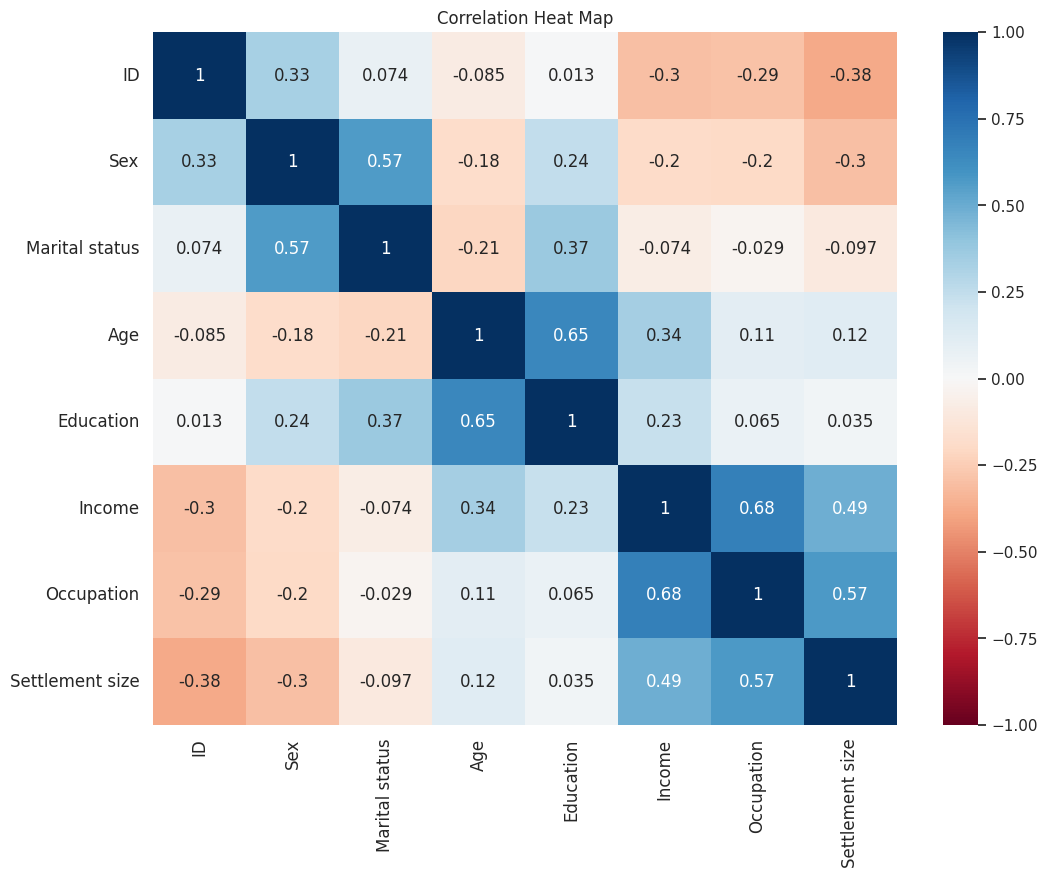

In [ ]:
plt.figure(figsize=(12,9))
s=sns.heatmap(segment_data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title("Correlation Heat Map")
plt.show()

Text(0.5, 1.0, 'Scatter plot between Age and Income')

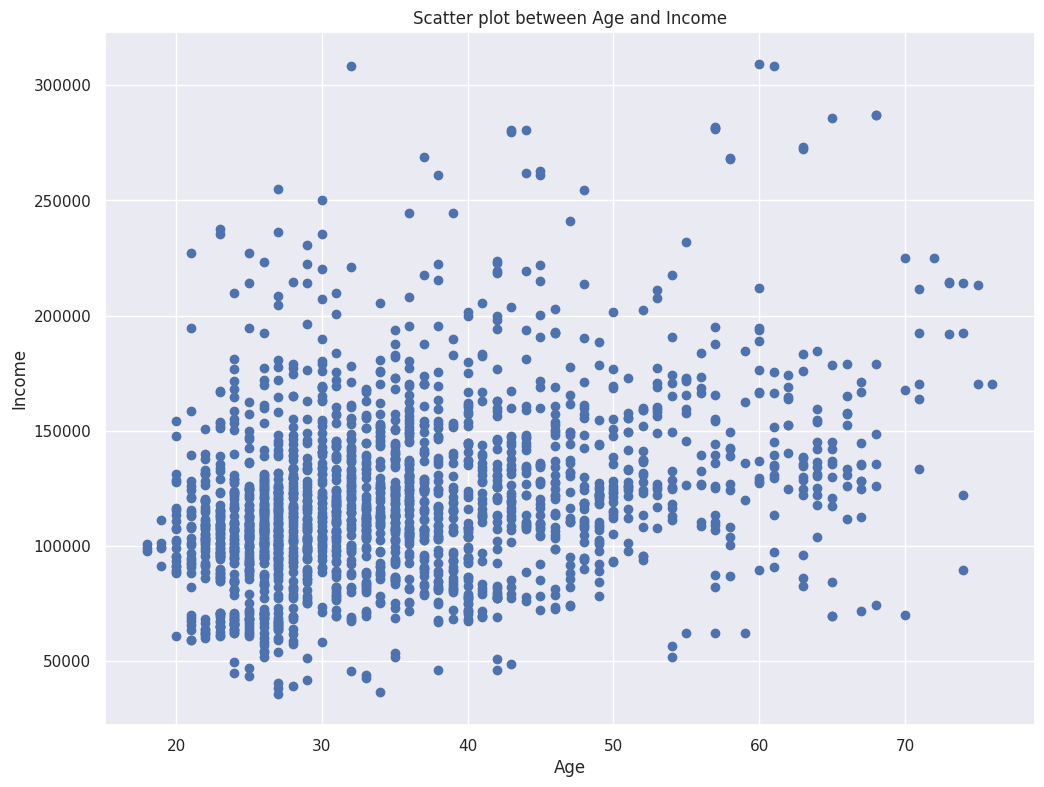

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(segment_data.iloc[:,3], segment_data.iloc[:,5])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter plot between Age and Income")

In [ ]:
scalar=StandardScaler()
scaled_segment=scalar.fit_transform(segment_data)
scaled_segment

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_segment)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[16000.0,
 12066.146078039474,
 10195.669345598919,
 8805.254481669766,
 7871.96298443615,
 7279.652806264399,
 6739.63983588173,
 6239.019877699335,
 5925.062962292425,
 5605.56117200798]

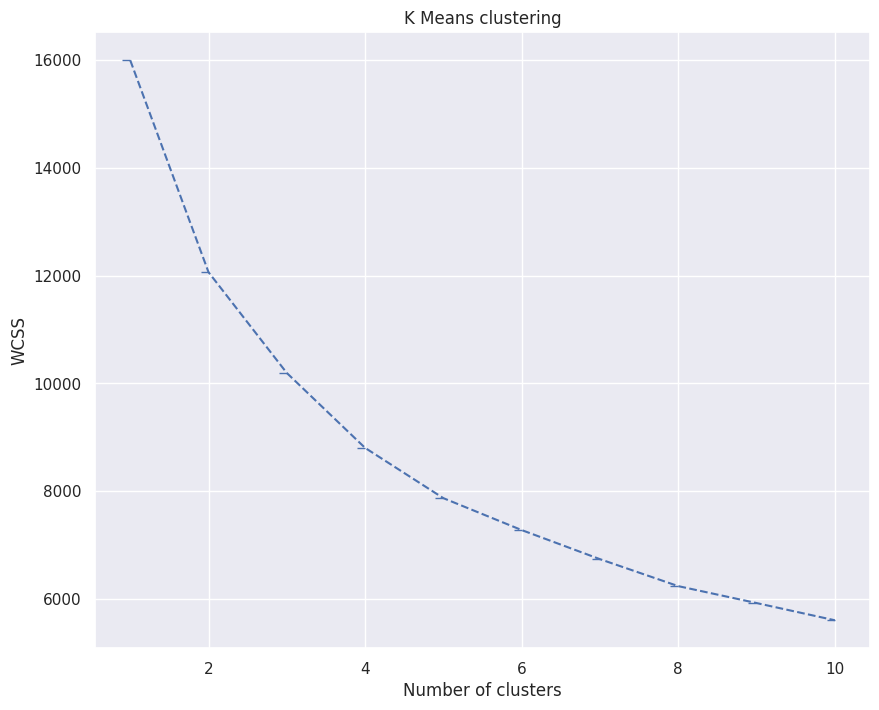

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker=0, linestyle= '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K Means clustering")
plt.show()
#Using Elbow method, the point till which the line is steep and from which the line is flat is choosen as number of clusters. Here it is 4.

In [ ]:
#Now let's fit K-means clustering with 4 clusters
kmeans=KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(scaled_segment)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
scaled_segment


array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
kmeans.labels_

array([3, 0, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
segmented_kmeans=segment_data.copy()
segmented_kmeans["Segments"]=kmeans.labels_
segmented_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
0,100000001,0,0,67,2,124670,1,2,3
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,2
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,2
1998,100001999,1,1,24,1,97968,0,0,0


In [ ]:
segment_analysis=segmented_kmeans.groupby(["Segments"]).mean()
segment_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segments,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481


In [ ]:
segment_analysis["Num of Obs"]=segmented_kmeans[["Segments", "Sex"]].groupby(["Segments"]).count()
segment_analysis


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs
Segments,,,,,,,,,
0,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679
1,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632
2,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419
3,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270


In [ ]:

segment_analysis.rename({0:"standard", 1:"career focussed", 2:"fewer oppurtunities", 3:"well-off"})

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num of Obs
Segments,,,,,,,,,
standard,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679
career focussed,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632
fewer oppurtunities,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419
well-off,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270


In [ ]:
segmented_kmeans['Labels']=segmented_kmeans['Segments'].map({0:"standard", 1:"career focussed", 2:"fewer oppurtunities", 3:"well-off"})
segmented_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments,Labels
0,100000001,0,0,67,2,124670,1,2,3,well-off
1,100000002,1,1,22,1,150773,1,2,0,standard
2,100000003,0,0,49,1,89210,0,0,2,fewer oppurtunities
3,100000004,0,0,45,1,171565,1,1,1,career focussed
4,100000005,0,0,53,1,149031,1,1,1,career focussed
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,2,fewer oppurtunities
1996,100001997,1,1,27,1,117744,1,0,0,standard
1997,100001998,0,0,31,0,86400,0,0,2,fewer oppurtunities
1998,100001999,1,1,24,1,97968,0,0,0,standard


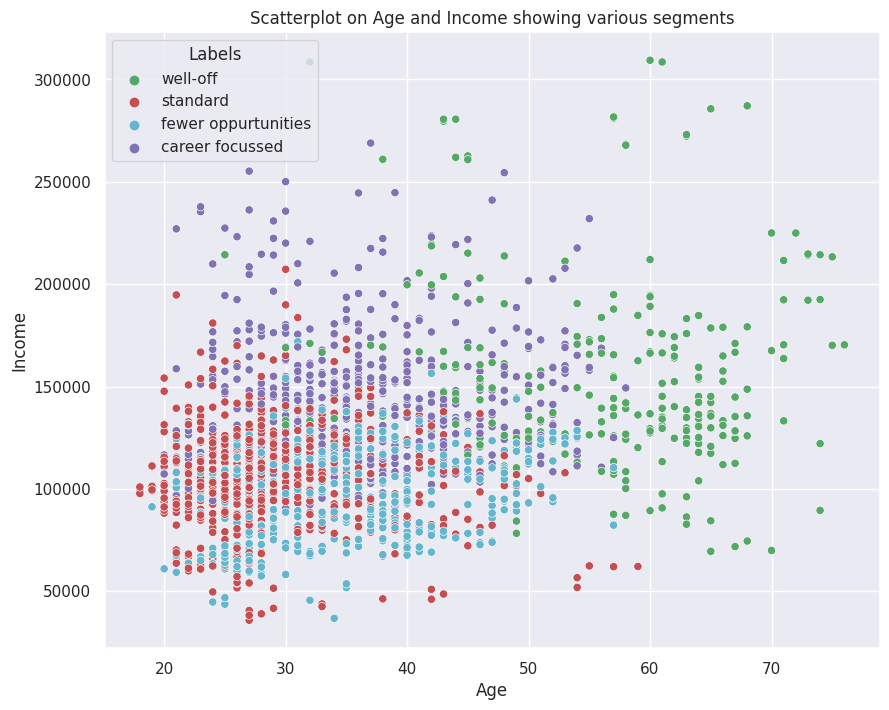

In [ ]:
plt.figure(figsize=(10,8))
xaxis=segmented_kmeans['Age']
yaxis=segmented_kmeans['Income']
#plt.scatter(segmented_kmeans['Age'],segmented_kmeans['Income'])
sns.scatterplot(data=segmented_kmeans, x='Age',y='Income', hue=segmented_kmeans['Labels'], palette=['g','r','c','m'])
plt.title("Scatterplot on Age and Income showing various segments")
plt.show()

In [ ]:
pca= PCA()
pca.fit(scaled_segment)
#The below code shows how much variance is explained by each component
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

Text(0, 0.5, 'Cumulative Explained variance')

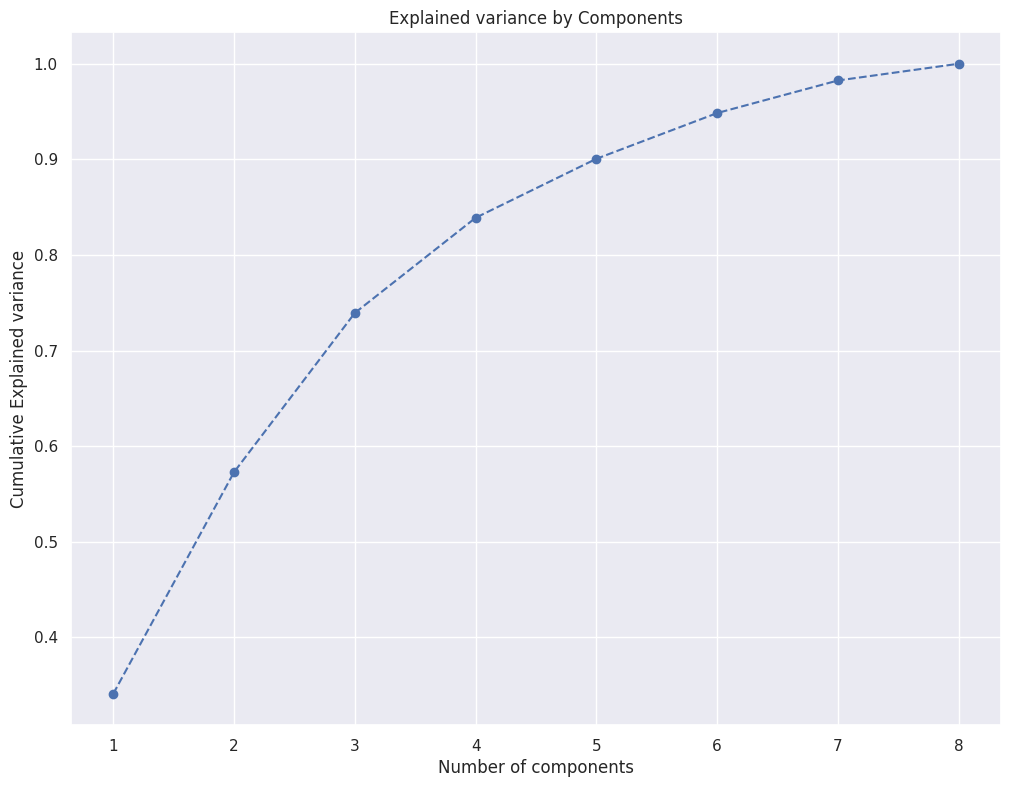

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--" )
plt.title("Explained variance by Components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained variance")

In [ ]:
pca=PCA(n_components=3)
pca.fit(scaled_segment)

PCA(n_components=3)

In [ ]:
pca.components_ #components show correlation of each variable to the component
df_pca_components=pd.DataFrame(data=pca.components_, columns=segment_data.columns.values, index=['Component 1', 'Component 2', 'Component 3'])
df_pca_components

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
Component 2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
Component 3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


([<matplotlib.axis.YTick at 0x7fef47637490>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

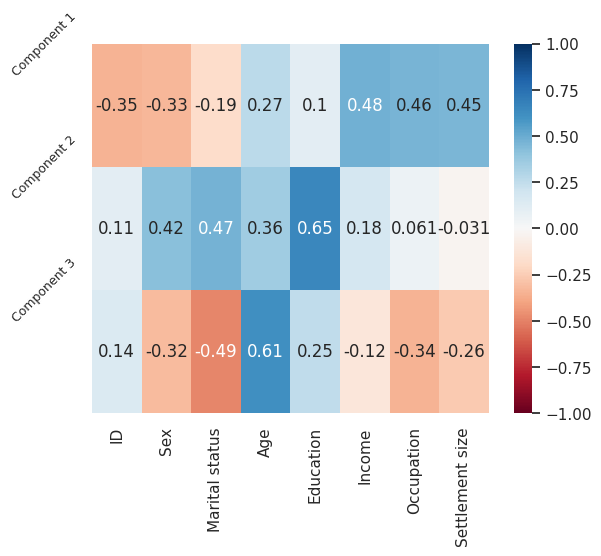

In [ ]:
sns.heatmap(df_pca_components, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.yticks([0,1,2], ['Component 1', 'Component 2', 'Component 3'], rotation=45, fontsize=9)


In [ ]:
scores_pca=pca.transform(scaled_segment)
scores_pca

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[11829.241204508344,
 7923.329847537414,
 6076.817753604324,
 4702.221015357867,
 3877.9872007525,
 3395.921586123037,
 2913.447320073637,
 2624.6556886236094,
 2352.570389148451,
 2071.90703864479]

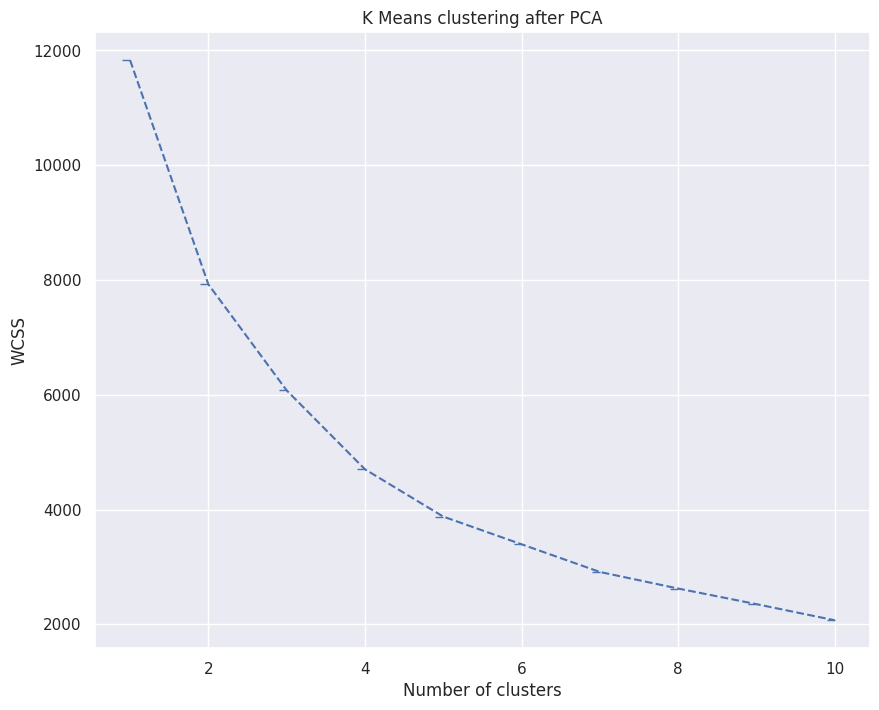

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker=0, linestyle= '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K Means clustering after PCA")
plt.show()
#Using Elbow method, the point till which the line is steep and from which the line is flat is choosen as number of clusters. Here it is 4.

In [ ]:
kmeans_pca= KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
wcss1=[]
for i in range(1,11):
    kmeans1_pca=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans1_pca.fit(scores_pca)
    wcss1.append(kmeans1_pca.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
wcss1

[11829.241204508344,
 7923.329847537414,
 6076.817753604324,
 4702.221015357867,
 3877.9872007525,
 3395.921586123037,
 2913.447320073637,
 2624.6556886236094,
 2352.570389148451,
 2071.90703864479]

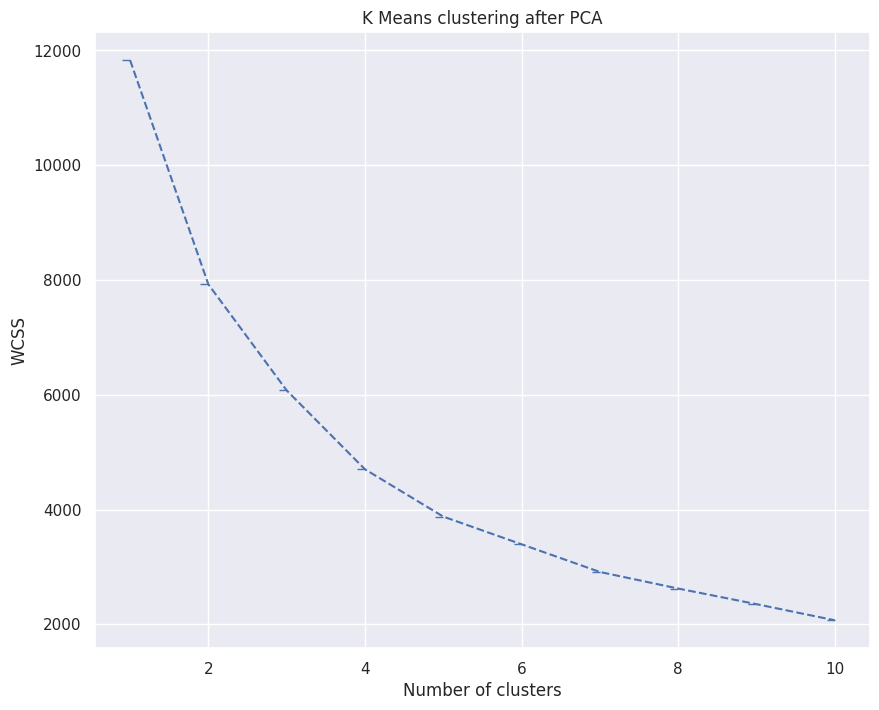

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss1, marker=0, linestyle= '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K Means clustering after PCA")
plt.show()

In [ ]:
kmeans_pca=KMeans(n_clusters=4, init='k-means++', random_state=42)

In [ ]:
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [47]:
segment_pca_kmeans=pd.concat([segment_data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
segment_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
segment_pca_kmeans['Segment k-means PCA']=kmeans_pca.labels_
segment_pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment k-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,3
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,3
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,0
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,3
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,0


In [49]:
segment_pca_kmeans_freq=segment_pca_kmeans.groupby(['Segment k-means PCA']).mean()
segment_pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment k-means PCA,,,,,,,,,,,
0,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262
1,1.000009e+08,0.492537,0.679104,55.873134,2.130597,156430.727612,1.097015,1.082090,1.483593,2.152720,0.893411
2,1.000007e+08,0.036278,0.194006,35.466877,0.739748,140435.219243,1.255521,1.394322,1.471999,-0.935925,-0.187509
3,1.000013e+08,0.338747,0.099768,34.902552,0.756381,92426.039443,0.211137,0.044084,-1.222765,-0.915172,1.009819
